
# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Training and testing the Model](#section4)<br>
    - 4.1 [Splitting data into training and test datasets](#section401)<br>
    - 4.2 [Linear regression in scikit-learn](#section402)<br>
    - 4.3 [Interpreting Model Coefficients](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Standardisation of data](#section6)<br>
7. [Feature Selection](#section7)<br>
8. [Handling Categorical Features](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

__Current Price__ for second hand car as a __function__ of __some operating parameters__ . In our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input as parameters and will __predicts the output sales__.

- Which parameters __contribute__ more to current price?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The dataset captures current price of the second hand car from Github.


__Importing Packages__

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pathakchiranjit/Machine-Learning/main/LinearRegression/Data/train.csv')
data.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


In [ ]:
data.shape

(1000, 12)

What are the **features**?
- on road old	
- on road now	
- years	
- km	
- rating
- condition	
- economy	
- top speed	
- hp	
- torque

What is the **response**?
- 	current price

<a id=section3></a>

## 3. Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [ ]:
#import dtale

In [ ]:
#df = data.copy()

In [ ]:
#dtale.show(df, ignore_duplicate=True)

In [ ]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

There are 1000 **observations**, and thus 1000 markets in the dataset.

__Distribution of Features__

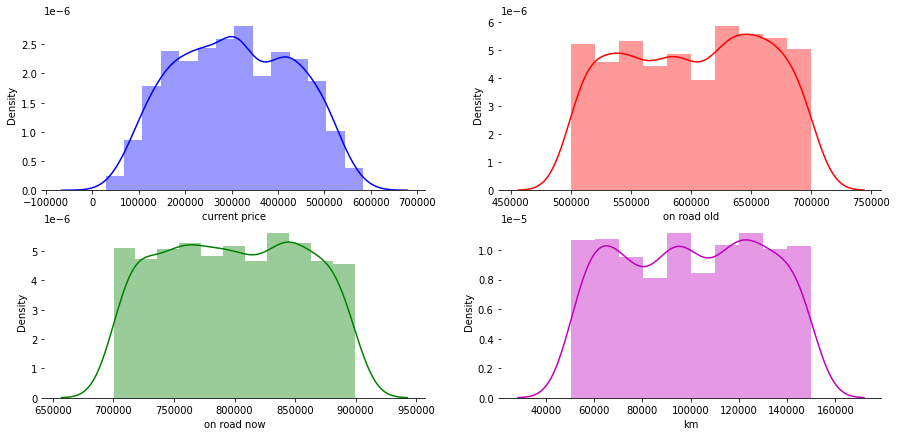

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data['current price'], color="b", ax=axes[0, 0])

sns.distplot(data['on road old'], color="r", ax=axes[0, 1])

sns.distplot(data['on road now'], color="g", ax=axes[1, 0])

sns.distplot(data['km'], color="m", ax=axes[1, 1])

### Is there a relationship between target and features?

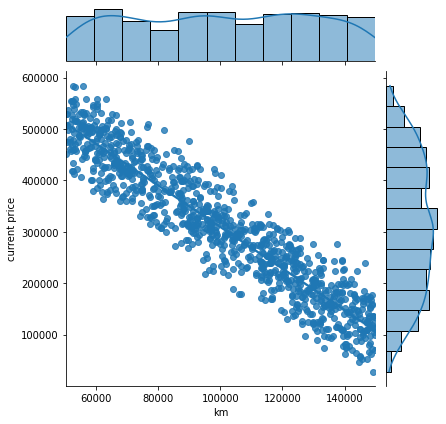

In [ ]:
JG1 = sns.jointplot("km", "current price", data=data, kind='reg')

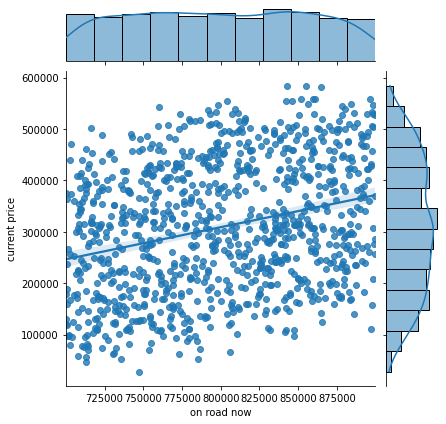

In [ ]:
JG2 = sns.jointplot("on road now", "current price", data=data, kind='reg')

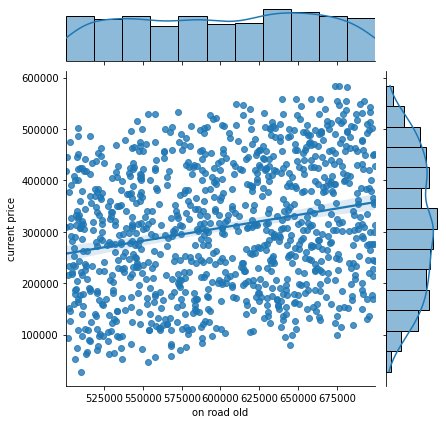

In [ ]:
JG3 = sns.jointplot("on road old", "current price", data=data, kind='reg')

In [ ]:
#JG4 = sns.jointplot("rating", "current price", data=data, kind='reg')

__Observation__<br/>
_km_ is __highly and negetively__ correlaed where are _others features_ __mildly correlated__.

### Visualising Pairwise correlation

In [ ]:
#sns.pairplot(data, height = 2, aspect = 1.5)
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


__Observation__

- Strong and negetive relationship between km and target
- Positive and less relationship between on road old & on road now and target
- Very weak to no relationship between others and target



### Calculating and plotting heatmap correlation

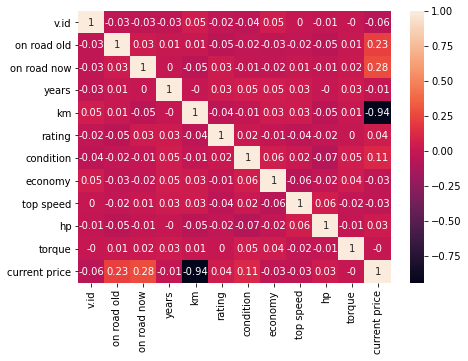

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __km and target is strongest i.e. -0.94__ and then between __on road old & now with target i.e. 0.23 & 0.28 respectively__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id=section4></a>

## 4. Training and Testing the Model

### 4.1 Splitting data into training and test datasets.

In [ ]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [ ]:
features = ['km']                # create a Python list of feature names
target = ['current price']                                     # Define the target variable

In [ ]:
data[features]

,km
0,78945
1,117220
2,132538
3,101065
4,61559
...,...
995,125092
996,83370
997,86722
998,140478


In [ ]:
data[target]

,current price
0,351318.0
1,285001.5
2,215386.0
3,244295.5
4,531114.5
...,...
995,190744.0
996,419748.0
997,405871.0
998,74398.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.25, random_state=0)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (750, 1)
y_train shape:  (750, 1)

Test cases as below
X_test shape:  (250, 1)
y_test shape:  (250, 1)


In [ ]:
X_train.head()

,km
253,114405
667,89225
85,78783
969,84252
75,104924


In [ ]:
y_train.head()

,current price
253,167281.5
667,315866.5
85,350647.5
969,313619.5
75,295002.0


In [ ]:
X_test.head()

,km
993,92988
859,73033
298,126379
553,147282
672,118682


In [ ]:
y_test.head()

,current price
993,307255.0
859,380928.5
298,121022.0
553,174352.5
672,190949.0


<a id=section402></a>

### 4.2 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate - Calculate RMSE and R square

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    ll_model.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)```

In [ ]:
#Instantiating the model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.3 Interpreting Model Coefficients

In [ ]:
print('Intercept:',lr_model.intercept_)          # print the intercept 
print('Coefficients:',lr_model.coef_)  

Intercept: [719400.70780149]
Coefficients: [[-4.0983257]]


In [ ]:
X_train.columns

Index(['km'], dtype='object')

In [ ]:
(lr_model.coef_).T

array([[-4.0983257]])

In [ ]:
coef1=pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)
coef1

,Co-efficients
km,-4.098326


In [ ]:
coef1['converted'] = 100* coef1['Co-efficients'].abs()/(coef1['Co-efficients'].abs().sum())
coef1

,Co-efficients,converted
km,-4.098326,100.0


__y = 719400.71 - 4.098 `*` km__

How do we interpret the km coefficient (-4.098)
- A "unit" increase in km is **associated with** a _"4.098_ unit" decrease in target.

### 4.4 Using the Model for Prediction

In [ ]:
y_pred_train = lr_model.predict(X_train)  

In [ ]:
y_pred_train

array([[250531.75655228],
       [353727.59757719],
       [396522.31449467],
       [374108.57126333],
       [289387.98247592],
       [213978.78966979],
       [253744.84389793],
       [361768.51259271],
       [212077.16654685],
       [333100.7243493 ],
       [476992.93953534],
       [430423.66465186],
       [446648.93608227],
       [372497.9292648 ],
       [319658.21606646],
       [467443.8406637 ],
       [298826.42655377],
       [119303.36776683],
       [332567.94200882],
       [404628.80272133],
       [293289.58853849],
       [238913.00320416],
       [255056.30812065],
       [123057.43410435],
       [365026.68152102],
       [191970.78068234],
       [132364.73175993],
       [147962.95935885],
       [255339.09259367],
       [261900.51203294],
       [125655.7725956 ],
       [313199.25476959],
       [182970.85745396],
       [156507.96843498],
       [114491.93339974],
       [210650.94920464],
       [426657.30333725],
       [224380.3402862 ],
       [2654

In [ ]:
y_pred_test = lr_model.predict(X_test)                                  # make predictions on the testing set

In [ ]:
y_pred_test

array([[338305.5979832 ],
       [420087.68724659],
       [201458.40466855],
       [115791.10264537],
       [233003.21755055],
       [274142.21088685],
       [307223.89590484],
       [256482.52546285],
       [152315.38124799],
       [327408.14995757],
       [393874.79609506],
       [142602.3493485 ],
       [321322.13629903],
       [453120.19235623],
       [199896.94257838],
       [345707.17419015],
       [209261.61679371],
       [454866.07910272],
       [508144.31315053],
       [249314.55382057],
       [444505.51174327],
       [136614.69550667],
       [339990.00984425],
       [450116.11962107],
       [242564.61139928],
       [278453.64951903],
       [294154.33526035],
       [325117.18589352],
       [183298.72350964],
       [238994.96971808],
       [147729.35479418],
       [307928.80792455],
       [208474.73826008],
       [266961.94426748],
       [312871.38871391],
       [242691.65949586],
       [227077.03859415],
       [441386.68588862],
       [3371

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our target predictions

In [ ]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 36281.40865026533
MAE for test set is 35453.7954088463


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our target predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2001568036.8982077
MSE for test set is 1882676753.2199771


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our target predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 44738.887300627044
RMSE for test set is 43389.82315267


In [ ]:
data['current price'].mean()

308520.2425

In [ ]:
RMSE_test/data['current price'].mean()

0.1406384968489385

Comparing these metrics:
- __RMSE__ is more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X=X_train
y=y_train
X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)
est2 = est.fit()
X2=sm.add_constant(X_test)
y=y_test
predictions = est2.predict(X2)
print(predictions)
print("r2_score",metrics.r2_score(y,predictions))

993    338305.597983
859    420087.687247
298    201458.404669
553    115791.102645
672    233003.217551
           ...      
462    325432.756972
356    175593.871201
2      176216.816707
478    171348.005780
695    470771.681129
Length: 250, dtype: float64
r2_score 0.8675214801384525


In [ ]:
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     5380.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:18:06   Log-Likelihood:                -9095.7
No. Observations:                 750   AIC:                         1.820e+04
Df Residuals:                     748   BIC:                         1.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.194e+05   5796.465    124.1

R-squared and R-squared adjusted same as we have one predictor here.

### 5.2 Model Evaluation using Rsquared value.

In [ ]:
# r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8779428684601269
R-Squared of test data: 0.8675214801384524


### 6. Standardisation of data

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.



**z = (x-x_mean)/stdev**

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

**"Standardization with out Y(target) variables"**

###First Standardized then Train_Test split:

In [ ]:
data2=data.copy()
data2.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0


In [ ]:
data2_y = data2['current price']
data2_y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64

In [ ]:
data2_x = data2.drop(['current price','v.id'],axis=1)
data2_x

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105
...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97
996,599626,848195,4,83370,2,9,14,161,101,120
997,646344,842733,7,86722,1,8,9,196,113,89
998,535559,732439,2,140478,4,5,9,184,112,128


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data2_x)
data3 = scaler.transform(data2_x) 
data3

array([[-1.13051571, -0.01658579, -0.90849848, ...,  0.52425644,
        -0.56303607,  0.93010397],
       [-0.16679708,  1.08638838,  0.83749475, ..., -0.97999178,
        -0.51427147, -0.40017703],
       [ 1.46188054, -0.49770498, -1.49049622, ...,  0.73173895,
        -1.53832807, -0.30515696],
       ...,
       [ 0.76562553,  0.76493465,  1.4194925 , ...,  1.50979838,
         1.38754793, -0.68523725],
       [-1.13209165, -1.17003325, -1.49049622, ...,  0.88735084,
         1.33878333,  1.16765415],
       [-0.19773338, -0.34014476,  0.25549701, ...,  1.66541026,
         0.70484353, -0.352667  ]])

In [ ]:
data2_x_st = pd.DataFrame(data3)
data2_x_st.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.130516,-0.016586,-0.908498,-0.732067,-1.417883,-1.272389,1.065293,0.524256,-0.563036,0.930104
1,-0.166797,1.086388,0.837495,0.581605,1.435001,1.207211,-1.177429,-0.979992,-0.514271,-0.400177
2,1.461881,-0.497705,-1.490496,1.107348,-0.704662,0.852982,1.513837,0.731739,-1.538328,-0.305157
3,-0.473625,-1.346488,-0.326501,0.027134,0.721780,-0.918160,-0.280340,1.561669,-1.489563,0.597534
4,1.537217,0.214097,0.837495,-1.328789,0.008559,1.207211,0.168204,-0.357544,-1.538328,0.074923


In [ ]:
data2_x_st.columns = ['on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque']

In [ ]:
data2_x_st.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,-1.130516,-0.016586,-0.908498,-0.732067,-1.417883,-1.272389,1.065293,0.524256,-0.563036,0.930104
1,-0.166797,1.086388,0.837495,0.581605,1.435001,1.207211,-1.177429,-0.979992,-0.514271,-0.400177
2,1.461881,-0.497705,-1.490496,1.107348,-0.704662,0.852982,1.513837,0.731739,-1.538328,-0.305157
3,-0.473625,-1.346488,-0.326501,0.027134,0.721780,-0.918160,-0.280340,1.561669,-1.489563,0.597534
4,1.537217,0.214097,0.837495,-1.328789,0.008559,1.207211,0.168204,-0.357544,-1.538328,0.074923


In [ ]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(data2_x_st, data2_y,\
                                                                test_size=0.25, random_state=1)
lr_model_st1 = LinearRegression()

In [ ]:
lr_model_st1.fit(X_train_st,y_train_st)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:',lr_model_st1.intercept_)          # print the intercept 
print('Coefficients:',lr_model_st1.coef_)  

Intercept: 308409.78348899476
Coefficients: [  29461.2007905    28537.79957185   -2694.09115576 -116014.6016802
     462.2704637    12825.41406256     375.84775813    -341.42900142
     537.41251652    -135.79504164]


In [ ]:
coef2_st=pd.DataFrame((lr_model_st1.coef_).T,index=X_train_st.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)
coef2_st

,Co-efficients
on road old,29461.200791
on road now,28537.799572
condition,12825.414063
hp,537.412517
rating,462.270464
economy,375.847758
torque,-135.795042
top speed,-341.429001
years,-2694.091156
km,-116014.601680


In [ ]:
coef2_st['converted'] = 100* coef2_st['Co-efficients'].abs()/(coef2_st['Co-efficients'].abs().sum())
coef2_st

,Co-efficients,converted
on road old,29461.200791,15.393614
on road now,28537.799572,14.911133
condition,12825.414063,6.701338
hp,537.412517,0.280801
rating,462.270464,0.241538
economy,375.847758,0.196382
torque,-135.795042,0.070954
top speed,-341.429001,0.178398
years,-2694.091156,1.407675
km,-116014.601680,60.618167


__y = 308409.78 + 29461.2 `*` (on road old_std) + 28537.8 `*` (on road now_std) + 12825.4 `*` (condition_std)+ 537.4 `*` (hp_std) + 462.2 `*` (rating_std) + 375.8 `*` (economy_std) - 135.8 `*` (torque_std)- 341.4 `*` (top speed_std)- 2694 `*` (years_std)- 116014.6 `*` (km_std)__

In [ ]:
data2_x.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000


In [ ]:
## The original Coefficients
coef1

,Co-efficients,converted
km,-4.098326,100.0


In [ ]:
y_pred_train_st = lr_model_st1.predict(X_train_st)  

In [ ]:
y_pred_test_st = lr_model_st1.predict(X_test_st)                # make predictions on the testing set

In [ ]:
RMSE_train_st2 = np.sqrt( metrics.mean_squared_error(y_train_st, y_pred_train_st))
RMSE_test_st2 = np.sqrt(metrics.mean_squared_error(y_test_st, y_pred_test_st))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train_st2))
print('RMSE for test set is {}'.format(RMSE_test_st2))

RMSE for training set is 8597.874376304058
RMSE for test set is 9019.847482190671


In [ ]:
## The original Coefficients
RMSE_test

43389.82315267

In [ ]:
100* RMSE_test/data['current price'].mean()

14.063849684893851

In [ ]:
100*RMSE_test_st2/data['current price'].mean()

2.923583687443352

In [ ]:
# r2_score is a standard metric in the sklearn library
r2_train_st2 = metrics.r2_score(y_train_st, y_pred_train_st)
r2_test_st2 = metrics.r2_score(y_test_st, y_pred_test_st)
print('R-Squared of train data:',r2_train_st2)
print('R-Squared of test data:',r2_test_st2)

R-Squared of train data: 0.9954359487550467
R-Squared of test data: 0.9945482202347281


In [ ]:
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8779428684601269
R-Squared of test data: 0.8675214801384524


In [ ]:
X=X_train_st
y=y_train_st
X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)
est2 = est.fit()
X2=sm.add_constant(X_test_st)
y=y_test_st
predictions = est2.predict(X2)
print(predictions)
print("r2_score",metrics.r2_score(y,predictions))

507    381276.918886
818    242373.028158
452    302147.765215
368    368577.754624
242    303688.380496
           ...      
385    392460.826414
890    434623.220439
439    420113.093814
135    215644.925472
567    237658.895221
Length: 250, dtype: float64
r2_score 0.9945482202347279


In [ ]:
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:18:06   Log-Likelihood:                -7858.7
No. Observations:                 750   AIC:                         1.574e+04
Df Residuals:                     739   BIC:                         1.579e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.084e+05    316.665    97

<a id=section7></a>

###First Train_Test split then Standardized:

In [ ]:
data3=data.copy()
data3.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0


In [ ]:
data3_y = data3['current price']
data3_y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64

In [ ]:
data3_x = data3.drop(['current price','v.id'],axis=1)
data3_x

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105
...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97
996,599626,848195,4,83370,2,9,14,161,101,120
997,646344,842733,7,86722,1,8,9,196,113,89
998,535559,732439,2,140478,4,5,9,184,112,128


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data3_x, data3_y,\
                                                                test_size=0.25, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_st = scaler.transform(X_train) 
X_test_st = scaler.transform(X_test) 

In [ ]:
df_X_train_st = pd.DataFrame(X_train_st)
df_X_test_st = pd.DataFrame(X_test_st)

In [ ]:
df_X_train_st.columns = ['on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque']
df_X_test_st.columns = ['on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque']

In [ ]:
df_X_test_st.head(3)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,-1.703305,-0.713218,1.448882,-1.317943,1.481605,-0.555303,-0.730665,-0.217618,1.392829,0.122671
1,-1.456535,-1.506404,-0.915996,-0.100460,0.030000,0.513501,-1.177647,1.642363,0.859908,0.358457
2,1.586139,1.347270,-1.507215,0.739045,1.481605,-0.911571,0.610278,-0.992609,1.441277,-1.103413


In [ ]:
lr_model_st1 = LinearRegression()

In [ ]:
lr_model_st1.fit(df_X_train_st,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:',lr_model_st1.intercept_)          # print the intercept 
print('Coefficients:',lr_model_st1.coef_)  

Intercept: 308320.63866666664
Coefficients: [  29749.58702558   28360.49047838   -2652.06944907 -116523.40913799
     454.25712952   12751.99844268     377.16208405    -342.78047486
     540.93153871    -136.81137721]


In [ ]:
coef2_st=pd.DataFrame((lr_model_st1.coef_).T,index=df_X_train_st.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)
coef2_st

,Co-efficients
on road old,29749.587026
on road now,28360.490478
condition,12751.998443
hp,540.931539
rating,454.257130
economy,377.162084
torque,-136.811377
top speed,-342.780475
years,-2652.069449
km,-116523.409138


In [ ]:
coef2_st['converted'] = 100* coef2_st['Co-efficients'].abs()/(coef2_st['Co-efficients'].abs().sum())
coef2_st

,Co-efficients,converted
on road old,29749.587026,15.503499
on road now,28360.490478,14.779595
condition,12751.998443,6.645491
hp,540.931539,0.281897
rating,454.257130,0.236729
economy,377.162084,0.196552
torque,-136.811377,0.071297
top speed,-342.780475,0.178634
years,-2652.069449,1.382082
km,-116523.409138,60.724225


Standardized and then Split:

__y = 308409.78 + 29461.2 `*` (on road old_std) + 28537.8 `*` (on road now_std) + 12825.4 `*` (condition_std)+ 537.4 `*` (hp_std) + 462.2 `*` (rating_std) + 375.8 `*` (economy_std) - 135.8 `*` (torque_std)- 341.4 `*` (top speed_std)- 2694 `*` (years_std)- 116014.6 `*` (km_std)__

Split and then Standardized:

__y = 308320.64 + 29749.6 `*` (on road old_std) + 28360.5 `*` (on road now_std) + 12752 `*` (condition_std)+ 540.93 `*` (hp_std) + 454.25 `*` (rating_std) + 377.2 `*` (economy_std) - 136.8 `*` (torque_std)- 342.8 `*` (top speed_std)- 2652 `*` (years_std)- 116523.4 `*` (km_std)__

In [ ]:
y_pred_train = lr_model_st1.predict(df_X_train_st)  

In [ ]:
y_pred_test = lr_model_st1.predict(df_X_test_st)                # make predictions on the testing set

In [ ]:
RMSE_train_st2 = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test_st2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train_st2))
print('RMSE for test set is {}'.format(RMSE_test_st2))

RMSE for training set is 8597.874376304058
RMSE for test set is 9019.847482190697


In [ ]:
## The original Coefficients
RMSE_test

43389.82315267

In [ ]:
100* RMSE_test/data['current price'].mean()

14.063849684893851

In [ ]:
100*RMSE_test_st2/data['current price'].mean()

2.9235836874433603

In [ ]:
# r2_score is a standard metric in the sklearn library
r2_train_st2 = metrics.r2_score(y_train, y_pred_train)
r2_test_st2 = metrics.r2_score(y_test, y_pred_test)
print('R-Squared of train data:',r2_train_st2)
print('R-Squared of test data:',r2_test_st2)

R-Squared of train data: 0.9954359487550467
R-Squared of test data: 0.9945482202347281


In [ ]:
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8779428684601269
R-Squared of test data: 0.8675214801384524


In [ ]:
y_train_st

298    121022.0
160    504643.5
268    164382.0
658    180368.5
996    419748.0
         ...   
767    467074.5
72     468543.0
908    390756.5
235    245796.0
37     421781.0
Name: current price, Length: 750, dtype: float64

In [ ]:
X=X_train_st
y=y_train
X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)
est2 = est.fit()
X2=sm.add_constant(X_test_st)
y=y_test
predictions = est2.predict(X2)
print(predictions)
print("r2_score",metrics.r2_score(y,predictions))

[381276.91888641 242373.02815812 302147.76521484 368577.75462387
 303688.38049629 267936.14376727 105816.50669994 230960.32677306
 346679.59879919 336846.89626488 279004.93297459 281762.76904705
 399294.84488356 236777.37632454 276551.23202196 430764.26954316
 426883.79630661 406135.44958023 498847.7918025  326340.09689473
 447857.10141289 479450.81461043 336254.96230454 161911.0505372
 165941.15880482 315230.47101073 491360.80590145 376567.80510077
 402554.5302678  308236.3906391  482391.88151685 308218.10527731
 526740.1626522  453261.55064493 310255.23873321 342183.80731656
 302475.50927371 479953.67027232  71067.79795286 247602.07287467
 185513.81356283 225770.77376261 307081.41853    353714.90334801
 292632.47772116 214309.74918172 267970.4323383  438650.99586257
 126527.97844781 198502.15636823 149480.71586096 311649.2387856
 261598.94478693 198272.29999139 138066.57272581 445859.42126261
 380013.48911348 164099.36712825 434594.00654612 458007.66216605
 107231.23186615 544065.452

In [ ]:
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:41:38   Log-Likelihood:                -7858.7
No. Observations:                 750   AIC:                         1.574e+04
Df Residuals:                     739   BIC:                         1.579e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.083e+05    316.278    974.8

###R-squared and R-squared adjusted both got increased --> inclusion of the predictors seems a good model.

## 7. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check with "on road old", "on road now" and "km" as final model features

In [ ]:
features_2 = ['on road old', 'on road now','km']                     # create a Python list of feature names
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[features_2], data[target], test_size=0.25, random_state=0)
lr_model_2 = LinearRegression()

In [ ]:
lr_model_2.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:',lr_model_2.intercept_)          # print the intercept 
print('Coefficients:',lr_model_2.coef_)  

Intercept: [14385.9556477]
Coefficients: [[ 0.50116129  0.49395082 -4.0078177 ]]


In [ ]:
coef2=pd.DataFrame((lr_model_2.coef_).T,index=X_train_2.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

In [ ]:
coef2['converted'] = 100* coef2['Co-efficients'].abs()/(coef2['Co-efficients'].abs().sum())
coef2

,Co-efficients,converted
on road old,0.501161,10.017356
on road now,0.493951,9.873231
km,-4.007818,80.109413


In [ ]:
y_pred_train_2 = lr_model_2.predict(X_train_2)  

In [ ]:
y_pred_test_2 = lr_model_2.predict(X_test_2)                # make predictions on the testing set

In [ ]:
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_2))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train_2))
print('RMSE for test set is {}'.format(RMSE_test_2))

RMSE for training set is 16217.613949969673
RMSE for test set is 14493.685827921523


In [ ]:
#RMSE_test_2 = 2.1

In [ ]:
RMSE_test_st2

9019.847482190697

In [ ]:
r2_test_2 = metrics.r2_score(y_test_2, y_pred_test_2)

In [ ]:
r2_test_2

0.9852181975678582

In [ ]:
r2_test_st2

0.9945482202347281

__y = 14385.95 + 0.501 `*` on road old + 0.494 `*` on road now - 4.007 `*` km__

In [ ]:
X_test_2

,on road old,on road now,km
993,601042,756860,92988
859,589700,754619,73033
298,547887,721567,126379
553,633198,860423,147282
672,515286,815528,118682
...,...,...,...
462,663065,840983,96129
356,514779,759061,132690
2,686990,770762,132538
478,636836,737079,133726


In [ ]:
y_test_2

,current price
993,307255.0
859,380928.5
298,121022.0
553,174352.5
672,190949.0
...,...
462,393351.0
356,109828.5
2,215386.0
478,155719.0


In [ ]:
#df=pd.DataFrame({'current price':y_test_2.flatten(), 'Predicted_current_price':y_pred_test_2.flatten()})
#df

In [ ]:
a=X_test_2.join(y_test_2, lsuffix="_left", rsuffix="_right")
a

,on road old,on road now,km,current price
993,601042,756860,92988,307255.0
859,589700,754619,73033,380928.5
298,547887,721567,126379,121022.0
553,633198,860423,147282,174352.5
672,515286,815528,118682,190949.0
...,...,...,...,...
462,663065,840983,96129,393351.0
356,514779,759061,132690,109828.5
2,686990,770762,132538,215386.0
478,636836,737079,133726,155719.0


In [ ]:
a['prediction']=14385.95 + 0.501 * a['on road old'] + 0.494 * a['on road now'] - 4.007 * a['km']

In [ ]:
a.head()

,on road old,on road now,km,current price,prediction
993,601042,756860,92988,307255.0,316793.916
859,589700,754619,73033,380928.5,389964.205
298,547887,721567,126379,121022.0,138930.782
553,633198,860423,147282,174352.5,166508.136
672,515286,815528,118682,190949.0,199856.294


In [ ]:
a['error'] = a['current price'] - a['prediction']

In [ ]:
a['error'].describe()

count      250.000000
mean      -979.874276
std      14490.274475
min     -18025.572000
25%      -9490.014250
50%      -7450.415500
75%       6675.399250
max      42648.639000
Name: error, dtype: float64

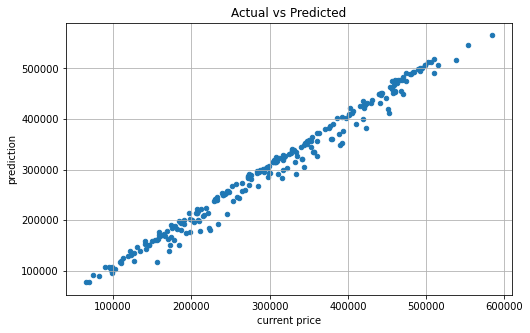

In [ ]:
a.plot.scatter(x='current price', y='prediction',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

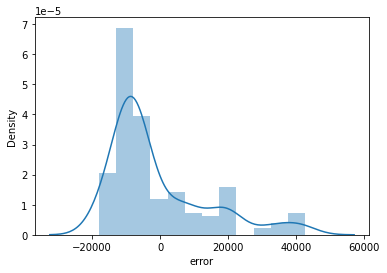

In [ ]:
sns.distplot(a['error'])

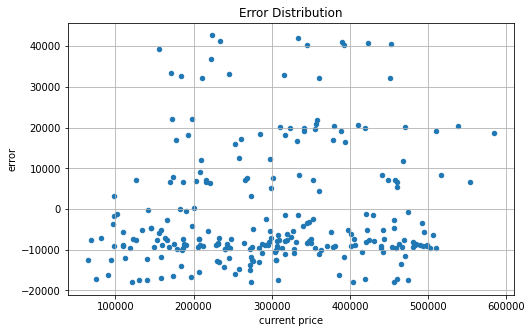

In [ ]:
a.plot.scatter(x='current price', y='error',\
                      figsize=(8,5), grid=True, title='Error Distribution');

In [ ]:
a.to_csv('data_with_predictions.csv')

In [ ]:
from google.colab import files
a.to_csv('second_hand_car_price.csv') 
files.download('second_hand_car_price.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id=section8></a>